<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/Ollama/Llama_3_2_Vision_Ollama_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Llama3.2 Vision with Langchain and Ollama

# Ollama
Ollama is a free and open-source tool that lets anyone run open LLMs locally on your system. It supports Linux (Systemd-powered distros), Windows, and macOS (Apple Silicon).

It is a command-line interface (CLI) tool that lets you conveniently download LLMs and run it locally and privately. With a couple of commands you can download models like Llama 3, Mixtral, and more.

- https://ollama.com/library
- https://github.com/ollama/ollama

# Llama 3.2 11B Vision Instruct

https://huggingface.co/meta-llama/Llama-3.2-11B-Vision-Instruct

The Llama 3.2-Vision collection of multimodal large language models (LLMs) is a collection of pretrained and instruction-tuned image reasoning generative models in 11B and 90B sizes (text + images in / text out). The Llama 3.2-Vision instruction-tuned models are optimized for visual recognition, image reasoning, captioning, and answering general questions about an image.


# Langchain Chat Ollama
LangChain is a framework for developing applications powered by large language models (LLMs).

https://python.langchain.com/docs/integrations/chat/ollama/

In [6]:
! pip install -Uqqq pip --progress-bar off
! pip install -qqq transformers -U --progress-bar off
! pip install sentence-transformers  langchain langchain-community langchain-huggingface trl datasets pypdf  -qqq --progress-bar off
! pip install torch torchvision -qqq --progress-bar off
! pip install langchain-ollama "ollama==0.4.2" -q

In [7]:
from langchain_ollama import OllamaEmbeddings

In [8]:
!pip install colab-xterm
%load_ext colabxterm

# install Ollama in xterminal
- curl https://ollama.ai/install.sh | sh

- Run server with:  ollama serve &

- Pull model ollama:  pull llama3.2-vision

In [23]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>


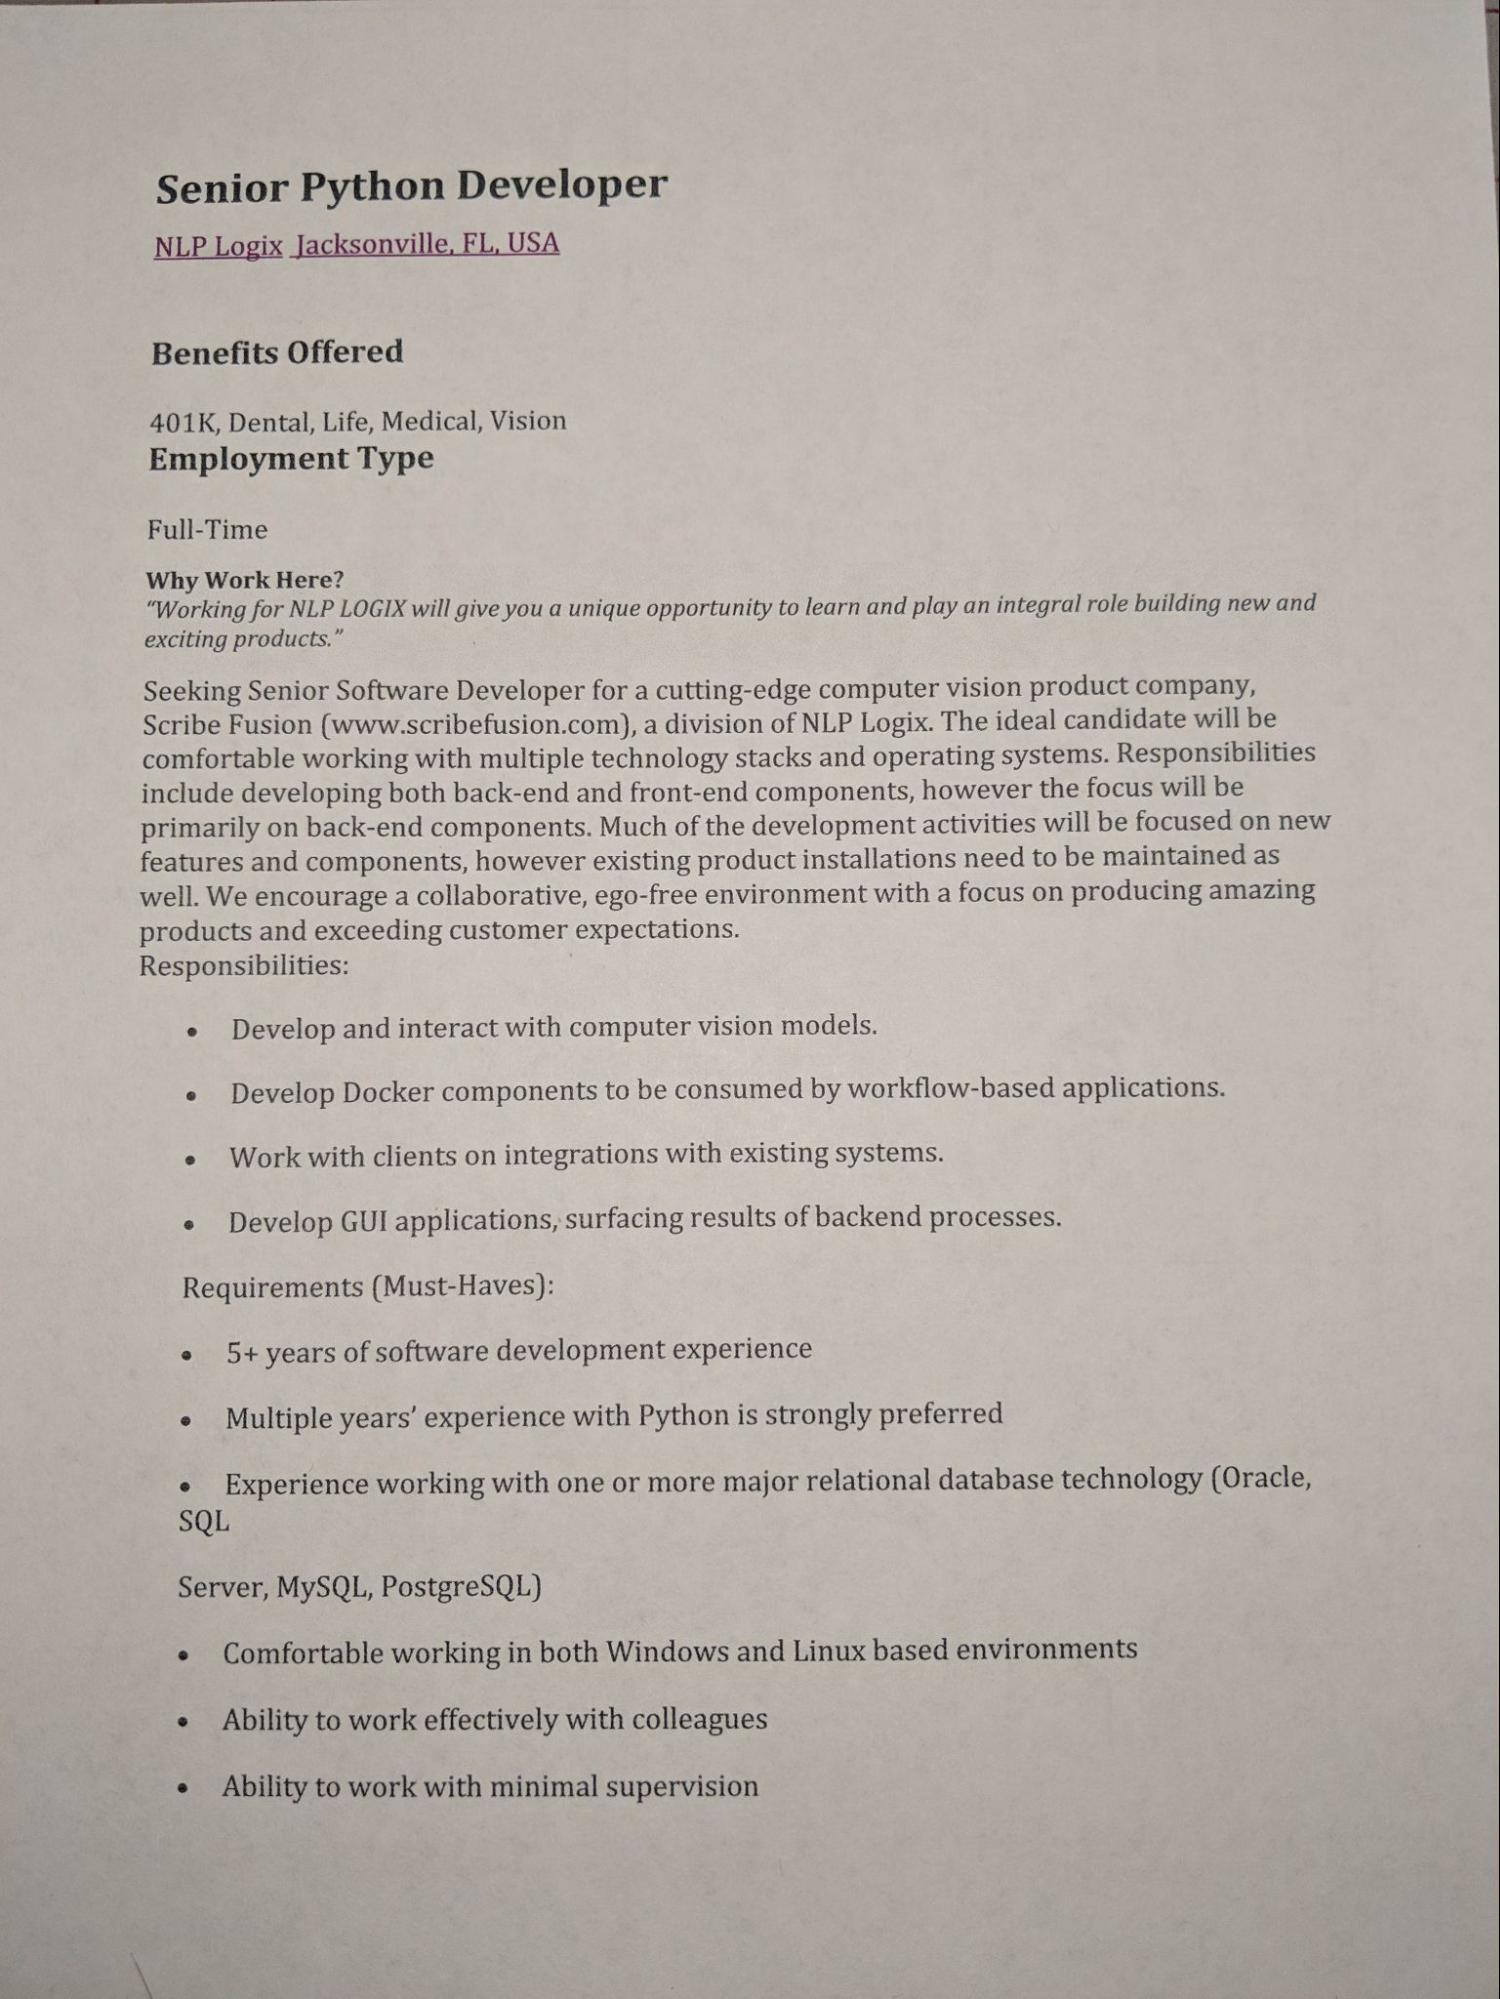

In [18]:
import base64
from io import BytesIO
import pprint

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "/content/drive/MyDrive/data/images/pict001.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)



In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2-vision", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "Only extract text of this image literally", "image": image_b64}
)

pprint.pprint(query_chain)

('Senior Python Developer\n'
 'NLP Logix Jacksonville, FL, USA\n'
 '\n'
 'Benefits Offered:\n'
 '401K, Dental, Life, Medical, Vision\n'
 '\n'
 'Employment Type: Full-Time\n'
 '\n'
 'Why Work Here?\n'
 '"Working for NLP LOGIX will give you a unique opportunity to learn and play '
 'an integral role building new and exciting products."\n'
 '\n'
 'Seeking Senior Software Developer for a cutting-edge computer vision product '
 'company, Scribe Fusion (www.scribefusion.com), a division of NLP Logix. The '
 'ideal candidate will be comfortable working with multiple technology stacks '
 'and operating systems. Responsibilities include developing both back-end and '
 'front-end components, primarily focusing on back-end components. Much of the '
 'development activities will focus on new features and components, but '
 'existing product installations need to be maintained as well. We encourage a '
 'collaborative, ego-free environment with a focus on producing amazing '
 'products and exceedin


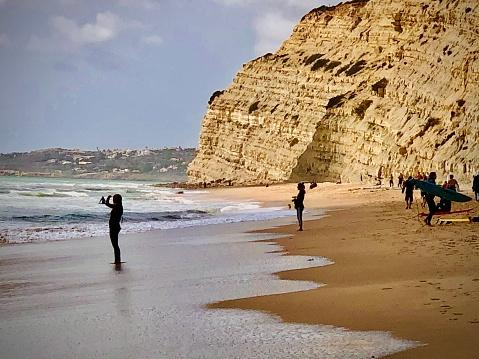

In [20]:
file_path = "/content/drive/MyDrive/data/beach.jpg"
pil_image = Image.open(file_path)

image_b642 = convert_to_base64(pil_image)
plt_img_base64(image_b642)

In [21]:
query_chain = chain.invoke(
    {"text": "Describe this image", "image": image_b642}
)

pprint.pprint(query_chain)

('The image depicts a serene beach scene, with a large cliff looming over the '
 'shore. The purpose of the image is to showcase the natural beauty of the '
 'coastline.\n'
 '\n'
 '* A large cliff:\n'
 '\t+ Dominates the right side of the image\n'
 '\t+ Has a rough, rocky texture\n'
 '\t+ Appears to be made of limestone or sandstone\n'
 '* People on the beach:\n'
 '\t+ Several individuals are scattered along the shoreline\n'
 "\t+ Some are standing near the water's edge, while others are sitting or "
 'lying down\n'
 '\t+ They appear to be enjoying the sun, sand, and surf\n'
 '* Water:\n'
 '\t+ The ocean waves gently lap at the shore\n'
 '\t+ The water is calm and peaceful, with no signs of rough seas or strong '
 'currents\n'
 '\n'
 'Overall, the image conveys a sense of tranquility and relaxation, inviting '
 'the viewer to step into the serene atmosphere of the beach.')
